# Import Python Libraries

All the necessary python libraries for this assignment are imported first.

In [1]:
import numpy as np # For scientific computing
import matplotlib.pyplot as plt # For data visualisation

## Analytical Solution:

The analytical solution to the differential equation:

$$\frac{dN_A}{dt} = - \frac{N_A}{\tau_{A}}$$

is 

$$N_{A}(t) = N_{A_{0}}.e^{\frac{-t}{\tau_{A}}}$$

Where: 

$N_{A}(t)$: The number of nuclei of type A at time t.

$N_{A_{0}} = N_{A}(0)$: The initial amount of nuclei of type A.

$t$: The time elapsed.

$\tau_{A}$: The time constant of nuclei of type A.

## Numerical Solution:

The numerical solution is obtained with Euler's method, which yields:

$$N_{A_{i}} = N_{A_{i-1}} - h.\frac{N_{A_{i-1}}}{\tau_{A}}$$

Where:

$N_{A_{i}} = N_{A}(t_{i})$

$t_{i} = t_{0} + i.h$

$i = 0,1,2,3 ...$

$h$: The time step.

## Python Code:

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


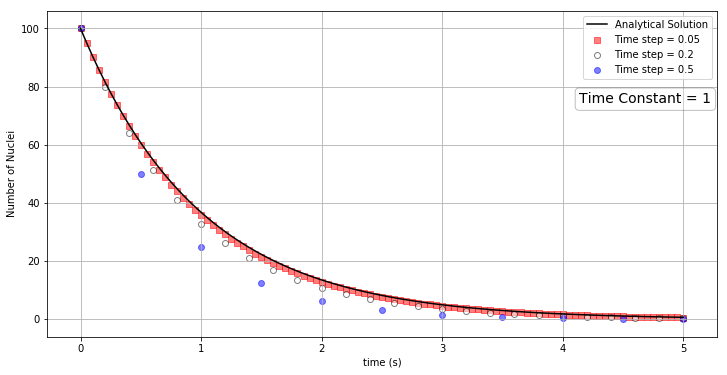

In [2]:
def nuclear_decay(N0, t_end, tau, dt1, dt2, dt3):
    
    # Parameters of this method
    # -------------------------
    
    # N0: Initial number of nuclei
    # t_end: Time duration
    # tau: Time constant
    # dt1: Time step 1
    # dt2: Time step 2
    # dt3: Time step 3
    
    # Other variables used
    # -------------------------
    
    # t_ex: time array for the exact solution
    # N_ex: Nuclei of type A, solved exactly
    # t_num1, t_num2, t_num3: time array for the numerical solution using time steps dt1, dt2 and dt3 respectively
    # N_num1, N_num2, N_num3: Nuclei of type A, solved numerically, using time steps dt1, dt2 and dt3 respectively
    
    # -----------------------------
    # Calculate exact solution
    # -----------------------------
    
    # Create a numpy array representing the time elapsed.
    # This array is linearly spaced and has 100 elements to ensure ...
    # ... the analytical solution displays as a continuous line.
    t_ex = np.linspace(0,t_end,100)
    # Calculate the number of nuclei as described.
    N_ex = N0 * np.e ** (-t_ex / tau)
    
    # -----------------------------------------------------
    # Calculate the numerical solutions with Euler's Method
    # -----------------------------------------------------
    
    # Solution for the 1st specified time step: dt1
    # ---------------------------------------------
    
    # Create a numpy array of the timesteps, using the specified ...
    # ... stepsize dt, and the final time t_end.
    t_num1 = np.arange(0,t_end+dt1,dt1)
    # Initialise the amount of nuclei as an array.
    N_num1 = [N0] 
    
    # Euler's method
    for i in range(1, len(t_num1)):
        # Calculate the number of nuclei as described.
        N_num1.append(N_num1[i-1] - (N_num1[i-1]/tau)*dt1)
        
    # Solution for the 2nd specified time step: dt2
    # ---------------------------------------------
    # Here the same thing method is applied as before, but ...
    # ... only a timestep of dt2 is used in stead.
    
    t_num2 = np.arange(0,t_end+dt2,dt2)
    N_num2 = [N0] # Initialise the amount of nuclei
    
    # Euler's method
    for i in range(1, len(t_num2)):
        N_num2.append(N_num2[i-1] - (N_num2[i-1]/tau)*dt2) 
        
    # Solution for the 3rd specified time step: dt3
    # ---------------------------------------------
    # And here a timestep of dt3 is used.
    
    t_num3 = np.arange(0,t_end+dt3,dt3)
    N_num3 = [N0] # Initialise the amount of nuclei
    
    # Euler's method
    for i in range(1, len(t_num3)):
        N_num3.append(N_num3[i-1] - (N_num3[i-1]/tau)*dt3) 
        
    # ----------
    # Plot
    # ----------

    # Create figure
    fig, ax = plt.subplots(figsize = [12,6])
    plt.grid('True') # Let the figure have a grid

    # Set figure labels and title
    plt.xlabel('time (s)')
    plt.ylabel('Number of Nuclei')
    
    # Plot analytical result as a solid line
    plt.plot(t_ex, N_ex, color = 'black', linestyle = '-', label = 'Analytical Solution')
    
    # Plot numerical results as individual data points
    # Numerical results of when dt1 was used.
    plt.scatter(t_num1, N_num1, alpha = 0.5, c = 'red', marker = 's', label = 'Time step = {}'.format(dt1))
    # ... results of when dt2 was used.
    plt.scatter(t_num2, N_num2, alpha = 0.5, c = 'white', marker = 'o', edgecolor = 'black', label = 'Time step = {}'.format(dt2))
    # ... results of when dt3 was used.
    plt.scatter(t_num3, N_num3, alpha = 0.5, c = 'blue', marker = 'o', label = 'Time step = {}'.format(dt3))

    # Add a textbox to the figure
    props = dict(boxstyle='round', facecolor='white', alpha=0.25) # Textbox properties
    txt = 'Time Constant = {}'.format(tau)
    ax.text(0.795, 0.75, txt, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    # Add a legend to the figure
    plt.legend(loc='upper right')

    # Show the figure
    plt.show()
    
    return None

# Call the function: nuclear_decay(N0, t_end, tau, dt1, dt2, dt3)
nuclear_decay(100, 5, 1, 0.05, 0.2, 0.5)

Suppose that nuclei of type A decays with time constant $\tau_A$ and forms nuclei of type B. The newly formed nuclei of type B then decays as well with time constant $\tau_B$.

The following system of differential equations describe the process:

$$\frac{dN_{A}}{dt} = \frac{-N_{A}}{\tau_{A}}$$

$$\frac{dN_{B}}{dt} = \frac{N_{A}}{\tau_{A}} - \frac{N_{B}}{\tau_{B}}$$

Where: 

$N_{A}(t)$: The number of nuclei of type A at time t.

$N_{A_{0}} = N_{A}(0)$: The initial amount of nuclei of type A.

$\tau_{A}$: The time constant of nuclei of type A.

$N_{B}(t)$: The number of nuclei of type B at time t.

$N_{B_{0}} = N_{B}(0)$: The initial amount of nuclei of type B.

$\tau_{B}$: The time constant of nuclei of type B.

$t$: The time elapsed.


The goal is to achieve the following:

* To obtain the analytical and numerical results of the system of differential equations and to compare them.

* To interpret the ratio: $\frac{\tau_{A}}{\tau_{B}}$ and to describe the short and long term behaviour of this ratio.

## Analytical solution to the system of differential equations

The first equation 

$$\frac{dN_{A}}{dt} = \frac{-N_{A}}{\tau_{A}}$$

is a simple first order differential equation with solution:

$$N_{A}(t) = N_{A_{0}}.e^{\frac{-t}{\tau_{A}}}$$

The second equation 

$$\frac{dN_{B}}{dt} = \frac{N_{A}}{\tau_{A}} - \frac{N_{B}}{\tau_{B}}$$

has solution:

$$N_{B}(t) = \frac{\lambda_{A}}{\lambda_{B}-\lambda_{A}}.N_{A_{0}}.e^{-\lambda_{A}.t} + N_{B_{0}}.e^{-\lambda_{B}.t}$$

Where:

$\lambda_{A} = \frac{1}{\tau_{A}}$: The decay constant of nuclei of type A.

$\lambda_{B} = \frac{1}{\tau_{B}}$: The decay constant of nuclei of type A.


Since $$N_{B_{0}} = 0$$ (there is no nuclei of type B present initially), the solution reduces to:

$$N_{B}(t) = \frac{\lambda_{A}}{\lambda_{B}-\lambda_{A}}.N_{A_{0}}.e^{-\lambda_{A}.t}$$

Source: [Tipler, Modern Physics, Production and Sequential Decays](https://www.macmillanlearning.com/studentresources/college/physics/tiplermodernphysics6e/more_sections/more_chapter_11_2-production_and_sequential_decays.pdf)

# Numerical Solution to the system of differential equations:

The solution to the system of differential equations is obtained with Euler's method, which yields:

$$N_{A_{i}} = N_{A_{i-1}} - h.\frac{N_{A_{i-1}}}{\tau_{A}}$$

and

$$N_{B_{i}} = N_{B_{i-1}} + h.\frac{N_{A_{i-1}}}{\tau_{A}} - h.\frac{N_{B_{i-1}}}{\tau_{B}}$$

In [3]:
def sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
    
    # Parameters of this method
    # -------------------------
    
    # N0_A: Initial number of nuclei of type A
    # t_end: Time duration
    # tau_A: Time constant for the decay of type A nuclei
    # tau_B: Time constant for the decay of type B nuclei
    # dt: Time step
    
    # Other variables used
    # --------------------
    
    # t_ex: time array for the exact solution
    # N_A_ex: Nuclei of type A, solved exactly
    # N_B_ex: Nuclei of type B, solved exactly
    # lambda_A: Decay constant for type A nuclei
    # lambda_B: Decay constant for type B nuclei
    # t_num: time array for the numerical solution using time step dt
    # N_A_num, N_A_num: Nuclei of type A and of type B respectively, solved numerically
    
    # --------------------------------------
    # Calculate Exact (Analytical) Solutions
    # --------------------------------------
    
    # Create a numpy array representing the time elapsed.
    # This array is linearly spaced and has 100 elements to ensure ...
    # ... the analytical solution displays as a continuous line.
    t_ex = np.linspace(0,t_end,100)
    
    # Calculate the number of nuclei of type A as described.
    N_A_ex = N0_A * np.e ** (-t_ex / tau_A)
    
    # Calculate the decay constants
    lambda_A = 1 / tau_A
    lambda_B = 1 / tau_B

    # Calculate the number of nuclei of type B as described.
    N_B_ex = ((N0_A*lambda_A) * (np.e ** (-lambda_A*t_ex) 
                                 - np.e ** (-lambda_B * t_ex))) /(lambda_B - lambda_A)

    # -------------------------------
    # Calculate Numerical Solutions
    # -------------------------------
    
    # In this case, the system of equations are solved with Euler's method
    
    # Create a numpy array of the timesteps, using the specified ...
    # ... stepsize dt, and the final time t_end.
    
    t_num = np.arange(0,t_end+dt,dt)
    
    N_A_num = [N0_A] # The initial amount of nuclei of type A
    N_B_num = [0] # The initial amount of nuclei of type B
    
    # Euler's method for the system of equations
    for i in range(1, len(t_num)):
        # Calculate as described
        N_A_num.append(N_A_num[i-1] - (N_A_num[i-1]/tau_A)*dt)
        N_B_num.append(N_B_num[i-1] + ((N_A_num[i-1]/tau_A)*dt) - ((N_B_num[i-1]/tau_B)*dt))
    
    # ----------
    # Plot
    # ----------

    # Create figure
    fig, ax = plt.subplots(figsize = [12,6])
    plt.grid('True') # Let the figure have a grid

    # Set figure labels and title
    plt.xlabel('time (s)')
    plt.ylabel('Number of Nuclei')
    
    # Plot analytical results as solid lines
    plt.plot(t_ex, N_A_ex, color = 'black', linestyle = '-', label = 'Type A Nuclei (Exact Solution)')
    plt.plot(t_ex, N_B_ex, color = 'grey', linestyle = '--', label = 'Type B Nuclei (Exact Solution)')
    
    # Plot the numerical results as seperate data points, red indicating type A nuclei, blue indicating type B nuclei
    plt.scatter(t_num, N_A_num, alpha = 0.5, c = 'red', marker = 's', s = 10, label = 'Type A Nuclei (Numerical Solution)')
    plt.scatter(t_num, N_B_num, alpha = 0.5, c = 'blue', marker = 's', s = 10, label = 'Type B Nuclei (Numerical Solution)')
    
    # Add a textbox to the figure
    props = dict(boxstyle='round', facecolor='white', alpha=0.25) # Textbox properties
    if(np.round(tau_A - tau_B) == 0):
        txt = r'$\tau_{A}$ = ' + str(tau_A) + '\n' +  r'$\tau_{B}$ = ' + str(tau_B) + '\n' +  r'$\tau_{A} / \tau_{B}$ $\approx$ ' + str(np.round(tau_A/tau_B,2))
    else:
        txt = r'$\tau_{A}$ = ' + str(tau_A) + '\n' +  r'$\tau_{B}$ = ' + str(tau_B) + '\n' +  r'$\tau_{A} / \tau_{B}$ = ' + str(np.round(tau_A/tau_B,2))
    ax.text(0.685, 0.75, txt, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    # Add a legend to the figure
    plt.legend(loc='upper right')

    # Show the figure
    plt.show()
    
    return None
    


## Interpreting the ratio $\frac{\tau_{A}}{\tau_B}$

To understand the physical meaning of the ratio $\frac{\tau_{A}}{\tau_B}$; the values of $\tau_{A}$ and $\tau_{B}$ can be altered, and it's effect on the amount of nuclei of type A and B over time can be compared.

To achieve this, the following should be tested:

- What happens when $\tau_{A} \approx \tau_{B}$?
- What happens when $\tau_{A} > \tau_{B}$?
- What happens when $\tau_{A} >> \tau_{B}$?
- What happens when $\tau_{A} < \tau_{B}$?
- What happens when $\tau_{A} << \tau_{B}$?

This is done by running the **sequential_nuclear_decay** method 5 times, each time choosing different values for the **tau_A** and **tau_B** variables.

- Run 1: Choosing **tau_A** and **tau_B** as nearly equal.
- Run 2: Choosing **tau_A** as 2 and **tau_B** as 1, such that: $\frac{\tau_{A}}{\tau_{B}} = 2$
- Run 3: Choosing **tau_A** as 4 and **tau_B** as 1, such that: $\frac{\tau_{A}}{\tau_{B}} = 4$
- Run 4: Choosing **tau_A** as 1 and **tau_B** as 2, such that: $\frac{\tau_{A}}{\tau_{B}} = 0.5$
- Run 5: Choosing **tau_A** as 1 and **tau_B** as 4, such that: $\frac{\tau_{A}}{\tau_{B}} = 0.25$

### Run 1: Choosing $\tau_{A}$ and $\tau_{B}$ as nearly equal.

Note: $\tau_{A}$ and $\tau_{B}$ can't exactly be equal, otherwise nuclei of type B would decay at the exact same rate as they are produced. Meaning no nuclei of type B would be present. Therefore, $\tau_{A}$ is chosen as 0.999 and $\tau_{B}$ is chosen as 0.998 such that $\tau_{A} \approx \tau_{B}$

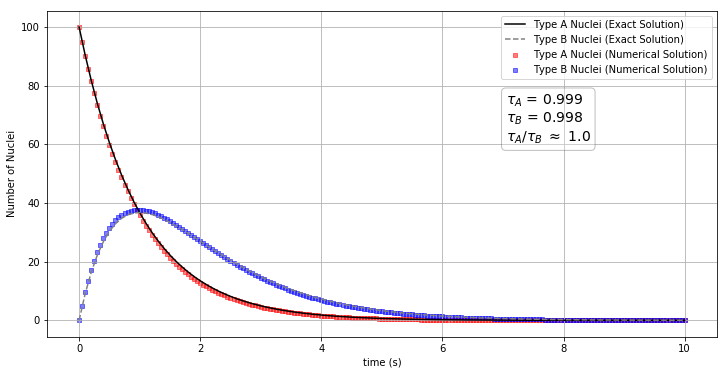

In [4]:
# Call the function: sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
sequential_nuclear_decay(100, 10, 0.999, 0.998, 0.05)

### Run 2: Choosing $\tau_{A}$ as 2 and $\tau_{B}$ as 1, such that: $\frac{\tau_{A}}{\tau_{B}} = 2$

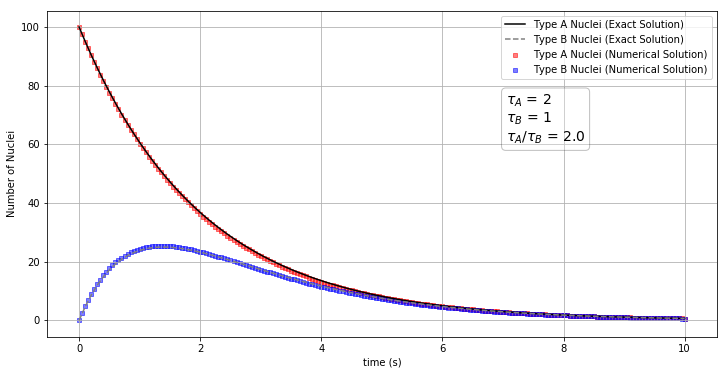

In [5]:
# Call the function: sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
sequential_nuclear_decay(100, 10, 2, 1, 0.05)

### Run 3: Choosing $\tau_{A}$ as 4 and $\tau_{B}$ as 1, such that: $\frac{\tau_{A}}{\tau_{B}} = 4$

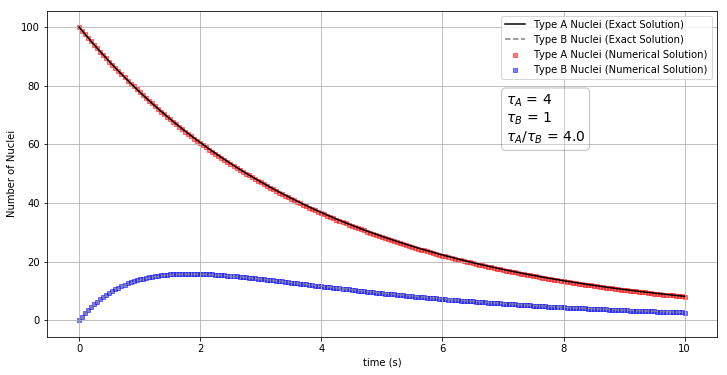

In [6]:
# Call the function: sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
sequential_nuclear_decay(100, 10, 4, 1, 0.05)

### Run 4: Choosing $\tau_{A}$ as 1 and $\tau_{B}$ as 2, such that: $\frac{\tau_{A}}{\tau_{B}} = 0.5$

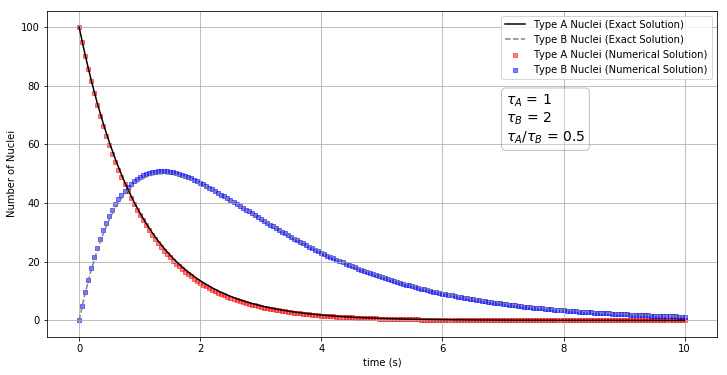

In [7]:
# Call the function: sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
sequential_nuclear_decay(100, 10, 1, 2, 0.05)

### Run 5: Choosing $\tau_{A}$ as 1 and $\tau_{B}$ as 4, such that: $\frac{\tau_{A}}{\tau_{B}} = 0.25$

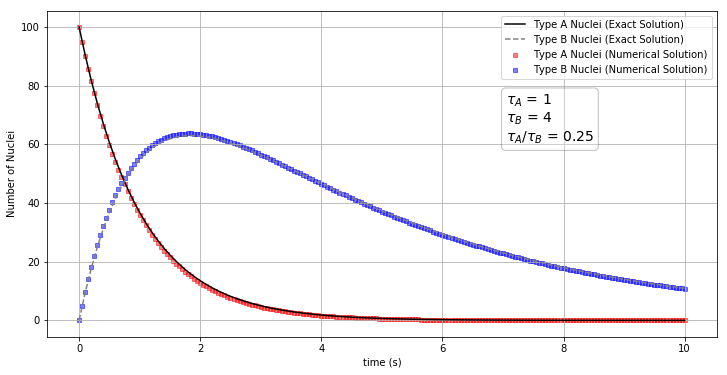

In [8]:
# Call the function: sequential_nuclear_decay(N0_A, t_end, tau_A, tau_B, dt):
sequential_nuclear_decay(100, 10, 1, 4, 0.05)